<a href="https://colab.research.google.com/github/sindhujeendru/Computer_vision/blob/main/Image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
import os
import cv2
items = os.listdir('/content/drive/MyDrive/Avantari interview assignment/dataset')
print (items)

['2231.jpg', '3067.jpg', '1868.jpg', '2552.jpg', '2664.jpg', '457.jpg', '3312.jpg', '2718.jpg', '1386.jpg', '2967.jpg', '1885.jpg', '495.jpg', '3551.jpg', '3121.jpg', '1044.jpg', '3581.jpg', '2950.jpg', '1562.jpg', '4464.jpg', '37.jpg', '3524.jpg', '3179.jpg', '1388.jpg', '2910.jpg', '2246.jpg', '3674.jpg', '3676.jpg', '408.jpg', '3234.jpg', '3963.jpg', '2529.jpg', '2168.jpg', '2395.jpg', '688.jpg', '420.jpg', '2919.jpg', '3222.jpg', '2982.jpg', '183.jpg', '2897.jpg', '566.jpg', '3748.jpg', '1286.jpg', '707.jpg', '2855.jpg', '2441.jpg', '3486.jpg', '3888.jpg', '355.jpg', '3018.jpg', '4519.jpg', '259.jpg', '4349.jpg', '2002.jpg', '3031.jpg', '3549.jpg', '3635.jpg', '2612.jpg', '478.jpg', '3653.jpg', '3437.jpg', '3737.jpg', '3790.jpg', '2264.jpg', '2685.jpg', '553.jpg', '4337.jpg', '2269.jpg', '3430.jpg', '627.jpg', '77.jpg', '1700.jpg', '1075.jpg', '3251.jpg', '1558.jpg', '1553.jpg', '1362.jpg', '4698.jpg', '2476.jpg', '727.jpg', '2738.jpg', '4020.jpg', '3868.jpg', '2722.jpg', '704.jpg'

#Below code is just a sample to append any 5 images array data into x_image.

In [3]:
count = 0
x_image = []
for each_image in items:
  if each_image.endswith(".jpg") and count < 5:
    print (each_image)
    full_path = "/content/drive/MyDrive/Avantari interview assignment/dataset/" + each_image
#    print (full_path)
    count = count + 1
#    if each_image == "2113.jpg":
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image     
    x_image.append(image)
    print(np.array(x_image).shape)
print('count : ', count)
#plt.figure()
#plt.imshow(image)
#plt.colorbar()
#plt.grid(False)

2231.jpg
(1, 512, 512, 3)
3067.jpg
(2, 512, 512, 3)
1868.jpg
(3, 512, 512, 3)
2552.jpg
(4, 512, 512, 3)
2664.jpg
(5, 512, 512, 3)
count :  5


#x_image[0] indicates 1st image in the array. Shape as (5, 512, 512, 3) indicates 5 as number of images in array. 512,512 indicates the pixel size of image. 
#3 indicates kind of RGB color


In [4]:
print(x_image[0])
print(np.array(x_image).shape)
print(np.array(x_image).size)

[[[  8  34   0]
  [  9  35   0]
  [ 11  36   4]
  ...
  [116 112 109]
  [124 120 119]
  [129 125 124]]

 [[  9  34   2]
  [ 10  35   3]
  [ 13  38   8]
  ...
  [116 112 109]
  [122 118 115]
  [125 121 118]]

 [[ 12  35   7]
  [ 14  37   9]
  [ 17  40  14]
  ...
  [115 114 109]
  [121 120 115]
  [124 123 118]]

 ...

 [[136 114 100]
  [116  97  82]
  [127 108  93]
  ...
  [127 127 129]
  [122 122 124]
  [122 122 124]]

 [[108  85  69]
  [127 106  89]
  [127 106  89]
  ...
  [130 130 132]
  [123 123 125]
  [123 123 125]]

 [[134 111  93]
  [127 104  86]
  [148 127 110]
  ...
  [135 135 137]
  [128 128 130]
  [127 127 129]]]
(5, 512, 512, 3)
3932160


#Below code is just to visualize any one of the pciture from the given dataset

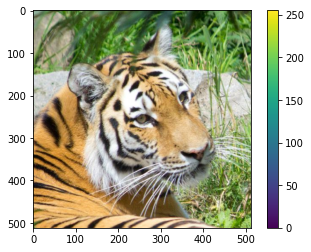

In [5]:
x_image[0]
plt.figure()
plt.imshow(x_image[3])
plt.colorbar()
plt.grid(False)

In [6]:
count = 0
x_images = []
for each_image in items:
  if each_image.endswith(".jpg"):
#    print (each_image)
    full_path = "/content/drive/MyDrive/Avantari interview assignment/dataset/" + each_image
#    print (full_path)
    count = count + 1
#    if each_image == "2113.jpg":
    image = cv2.imread(full_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = image     
    x_images.append(image)
print('count : ', count)
print(np.array(x_image).shape)

count :  4738
(5, 512, 512, 3)


In [7]:
print(np.array(x_images).shape)

(4738, 512, 512, 3)


In [8]:
print(len(x_images))
per = int(0.7 * len(x_images))
x_train, x_test = x_images[:per], x_images[per:]
print(np.array(x_train).shape)
print(np.array(x_test).shape)
print('train min : ', np.array(x_train).min())
print('train max : ', np.array(x_train).max())
print('test max : ', np.array(x_test).max())
print('test min : ', np.array(x_test).min())

4738
(3316, 512, 512, 3)
(1422, 512, 512, 3)
train min :  0
train max :  255
test max :  255
test min :  0


Since the dataset contains a range of values from 0 to 255, the dataset has to be normalized. Data Normalization is an important preprocessing step which ensures that each input parameter (pixel, in this case) has a similar data distribution. This fastens the process of covergence while training the model. Also Normalization makes sure no one particular parameter influences the output significantly.
Data normalization is done by subtracting the mean from each pixel and then dividing the result by the standard deviation. The distribution of such data would resemble a Gaussian curve centered at zero. For image inputs we need the pixel numbers to be positive. So the image input is divided by 255 so that input values are in range of [0,1].

In [ ]:
# Data Normalization
# Conversion to float
x_train = np.array(x_train).astype('float32') 
x_test = np.array(x_test).astype('float32')
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

Now again after normalization, lets check min,max

In [ ]:
print(x_train.min())
print(x_train.max())